<a href="https://colab.research.google.com/github/AlannaGonzaga/Mini_project_CovidTweet/blob/main/Teste_Covid_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Teste para vaga de Cientista de Dados Junior**


# A Ciência da Informação e a COVID-19: análise de sentimentos no Twitter

<center><img alt="Analisando Airbnb"  src="https://ipullrank.com/wp-content/uploads/2017/04/sentiment-analysis-tools-1400.jpg"></center>

Esse projeto refere-se a análise exploratória com abordagem quantitativa e com o objetivo de observar os níveis de polaridade sentimental dos usuários do Twitter diante do COVID-19. 

Basicamente é a apresentação técnica na qual um algoritmo toma como entrada de dados, neste caso, o post de pessoas que inseriram seus sentimentos como positivo, negativo ou neutro. Em linhas gerais, é descobrir o humor do público sobre um determinado assunto, que no caso desse projeto, a palavra escolhida foi o covid.

Foi utilizada a linguagem em python para aplicar as técnicas de Mineração de Textos, tratamento, estrutura e análise. Essa construção foi feita a partir de um arquivo.zip denominado covid_tweets.



In [ ]:
# Importando os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [ ]:
# Importar o dataset covid_tweet para um Dataframe 

dados = pd.read_csv('covid_tweets.csv', engine= 'python')


Foi preciso utilizar a solução para a leitura da codificação de caracteres no arquivo csv. Por isso utilizamos a solução engine = 'python' na chamada da função read_csv.

In [ ]:
# Visualização das cinco primeiras linhas do Dataset 
dados.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
dados.OriginalTweet.count()

41157

Total de Entradas no Dataset foi de 41.157 tweets

In [ ]:
# Resumo geral do Dataset
print('Este dataset contém:')
print('{:,} entradas'.format(dados.shape[0]).replace(',','.'))
print('{} Variáveis'.format(dados.shape[1]))

Este dataset contém:
41.157 entradas
6 Variáveis


In [ ]:
# Verificando a ultima data do Dataset
max = dados.TweetAt.max()
max

'31-03-2020'

In [ ]:
# Nomes das colunas no Dataset
dados.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Tipos de variáveis no Dataset
pd.DataFrame(dados.dtypes, columns=['Tipo de Dados'])

,Tipo de Dados
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object


In [ ]:
dados.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#retornando a exibir menos linhas
pd.set_option('display.max_rows',10)

# Verificando os campos nulos que podem comprometer a análise do dataset
dados_covid = dados[['ScreenName','Location']]
dados_covid[dados_covid['Location'].isna()]

,ScreenName,Location
3,48754,NaN
4,48755,NaN
14,48765,NaN
22,48773,NaN
23,48774,NaN
...,...,...
41148,89899,NaN
41151,89902,NaN
41153,89904,NaN
41154,89905,NaN


Percebe-se que algumas localidades aparece a palavra "NaN" ou seja, está vazia. Para evitar que esses valores possam comprometer nossa análise, iremos retira-los da base.

In [ ]:
#Sem localidade
df_semnulos = dados[~dados['Location'].isna()]

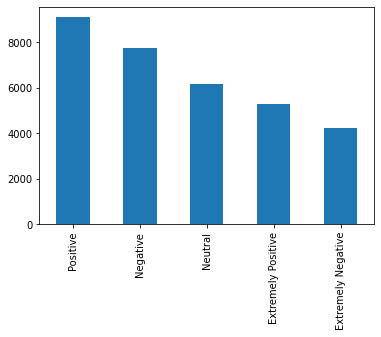

In [ ]:
# Visualizando esses dados graficamente:
df_semnulos.Sentiment.value_counts().plot(kind='bar')

In [ ]:
# Calculo em porcentagem
(df_semnulos['Sentiment'].value_counts()/df_semnulos['Sentiment'].count())*100

Positive              27.973102
Negative              23.837013
Neutral               18.951700
Extremely Positive    16.191237
Extremely Negative    13.046949
Name: Sentiment, dtype: float64

As linhas do código tiveram a seguinte informação:
* Porcentagem positiva de tweets : 27.9%
* Porcentagem negativa de tweets : 23.8%
* Porcentagem neutro de tweets : 18.9%
* Porcentagem extremamente positiva de tweets : 16.1%
* Porcentagem extremamente negativa de tweets : 13.0%


In [ ]:
# Número de linhas da coluna ‘OriginalTweet’:
df_semnulos.OriginalTweet.count()

32567

In [ ]:
dados.drop_duplicates(['OriginalTweet'], inplace=True)

In [ ]:
df_semnulos.OriginalTweet.count()

32567

In [ ]:
tweets = df_semnulos['OriginalTweet']
classes = df_semnulos['Sentiment']

Importamos a biblioteca NLTK (Natural Language Toolkit) que contém pacotes para fazer com que as máquinas entendam a linguagem humana. Para essa análise só utilizamos os pacotes Stopwords que filtra palavras e termos frequentes que não tem relevância nos dados e remover os caracteres indesejados.


In [ ]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Foi feito uma "limpeza" nos dados para deixá-los de uma maneira que a algoritimo pudesse entender, neste caso foi eliminado caracteres não alfanúmérico.

In [ ]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
tweets = [Preprocessing(i) for i in tweets]

Notar acima que foi retirado as informações de links que não contribui em nada para nossa análise. A lista também foi renomeada, de OriginalTweet para tweets, somente para fins de melhor entendimento.

In [ ]:
tweets[:10]

['@menyrbie @phil_gahan @chrisitv',
 'advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order',
 'coronavirus australia woolworths give elderly, disabled dedicated shopping hours amid covid19 outbreak',
 'news region\x92s first confirmed covid19 case came sullivan county last week, people flocked area stores purchase cleaning supplies, hand sanitizer, food, toilet paper goods, @tim_dodson reports',
 'cashier grocery store sharing insights #covid_19 prove credibility commented "i\'m civics class know i\'m talking about"',
 'supermarket today buy toilet paper #rebel #toiletpapercrisis #covid_19',
 'due covid19 retail store classroom atlanta open walkin business classes next two weeks, beginning monday, march 16 continue process online phone orders normal! thank understanding!',
 'corona prevention,we stop buy things cash use online payment methods c

Mostramos nesta curta análise que é possível fazer uso de ferramentas simples na linguagem de programação Python para realizar uma Análise de Sentimentos sobre a palavra covid no twitter ou em qualquer outra amostra. 

Notamos que o sentimento geral ficou equilibrado porém existem muitas outras formas e ferramentas de coleta de dados disponíveis em diversas bibliotecas que precisam ser muito estudada pois possui uma complexidade que vai muito além dessa análise.

Obrigada pela leitura!

Alanna Gonzaga 

Os códigos poderão ser visto melhor em minha página do GitHub https://github.com/AlannaGonzaga
